In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

**This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.**

In [ ]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

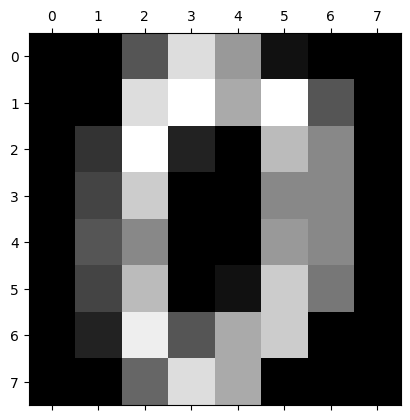

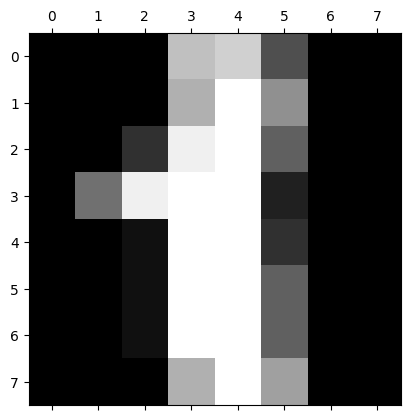

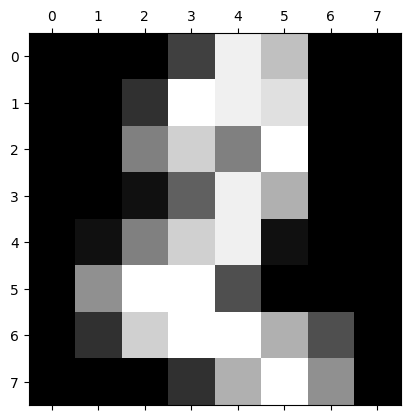

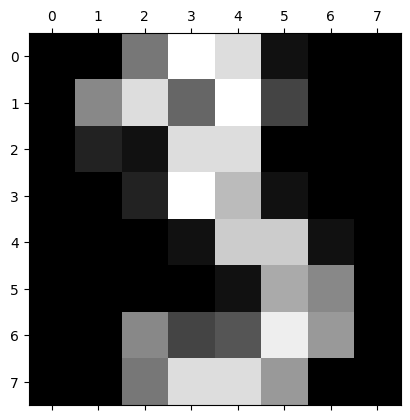

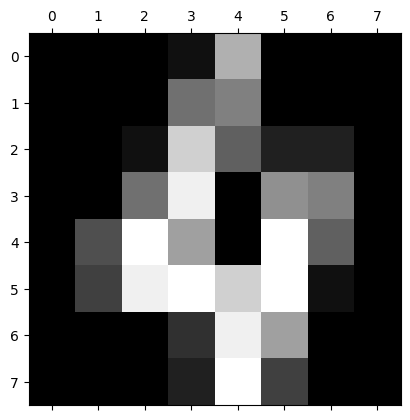

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])
plt.show()  # This will give One dimensional array

**In 'target' there are the numbers which is what exactly in the image**

In [ ]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [73]:
x_train

array([[ 0.,  0., 10., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 14.,  2.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ..., 14.,  3.,  0.]])

In [74]:
len(x_train)

1437

In [75]:
y_train

array([9, 4, 0, ..., 6, 5, 3])

In [76]:
len(y_test )

360

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

The **make_pipeline** function in scikit-learn is like a cooking recipe where you have different steps to prepare a dish. Similarly, in machine learning, you have different steps to prepare and process your data before feeding it into a model.

**StandardScaler**
Imagine you have a bunch of ingredients that are measured in different units, like ounces, grams, or cups. When you're following a recipe, it's easier if all ingredients are in the same unit. **The StandardScaler acts like a tool that adjusts the scale of these ingredients so that they're all in the same unit, making it easier for your recipe (the model) to understand and use these ingredients effectively.**

For instance, if you have some data where one feature's values range from 1 to 10 and another feature's values range from 1000 to 10000, the StandardScaler will adjust these values to be more similar, like scaling them to a mean of 0 and a standard deviation of 1, so they can be more comparable and easier for the model to work with.

**LogisticRegression**
The LogisticRegression is the main part of your recipe. It's like the chef that uses the ingredients (your data) prepared by the StandardScaler to cook and create your final dish (make predictions or classifications based on the data).

**make_pipeline(StandardScaler(), LogisticRegression())**
Now, when you put StandardScaler and LogisticRegression together with make_pipeline, it's like having a cooking process with different steps. The pipeline ensures that your data is prepared (scaled) before it's used by the model. It's a convenient way to organize the different stages of preparation before your model uses the data.

So, just like you might chop vegetables before cooking, make_pipeline helps prepare your data (scaling) before fitting it into your model (LogisticRegression).

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

**Measure accuracy of our model**

In [79]:
digits.target[88]

6

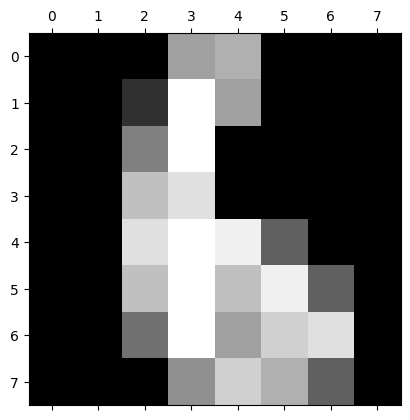

In [80]:
plt.matshow(digits.images[88])

In [81]:
model.predict([digits.data[88]])

array([6])

**The above prdiction it did is accurate ,i.e, at 88th place it is value 6**

In [82]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [83]:
model.score(x_test,y_test)

0.9666666666666667

#How do I know where it didn't do well...I want to know where exactly it failed and want to get an overall feeling of my model accuracy...
# For this we can use Confusion Matrix

In [84]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

In [85]:
cm = confusion_matrix(y_test,y_predicted) # y_test is truth and y_predicted: this is what our model predicted
cm # Gives 2 dimensional array

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 30]])

**For better visualsation we'll use seaborn heatmap to represent/visualize the data**

Text(95.72222222222221, 0.5, 'Truth')

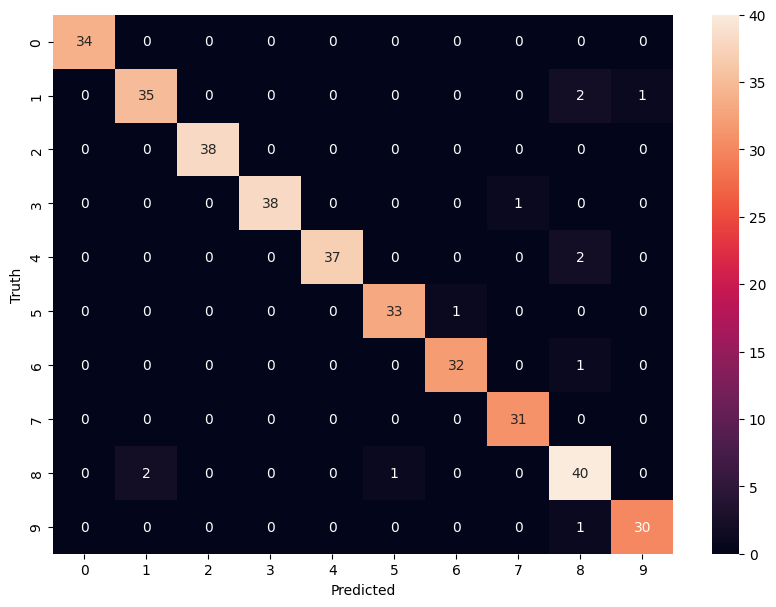

In [86]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**From above heatmap we can understand that for eg. here in truth there is 4 in reality but our machine predicted 8... 2 times**